In [1]:
!pip install pandas

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

In [3]:
df=pd.read_csv(r"C:\Users\shras\Downloads\IPL 2022 Batters.csv")

In [4]:
df.isnull().sum()

Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
dtype: int64

In [5]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
1,K L Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45
2,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47
3,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49
4,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51


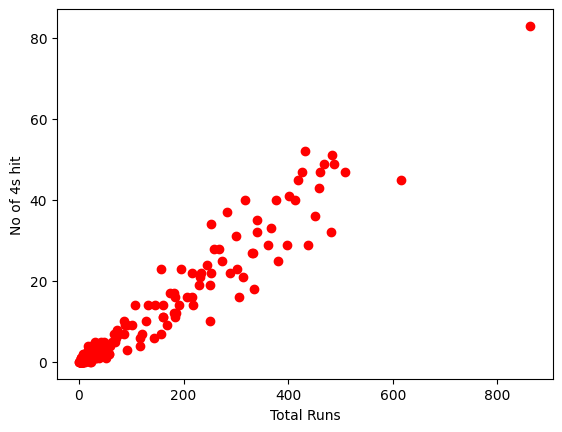

In [6]:
plt.scatter(df['Runs'],df['4s'],c='red')
plt.xlabel("Total Runs")
plt.ylabel("No of 4s hit")
plt.show()

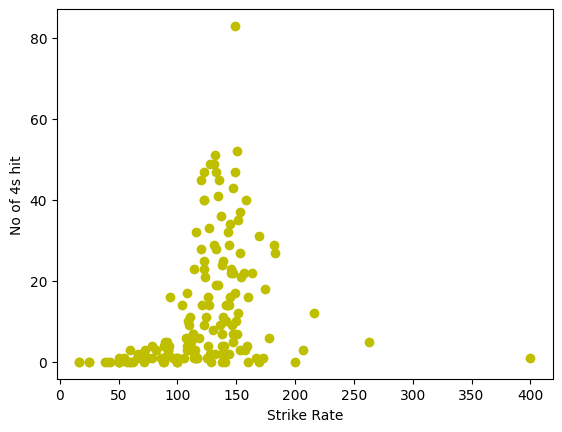

In [7]:
plt.scatter(df['SR'],df['4s'],c='y')
plt.xlabel("Strike Rate")
plt.ylabel("No of 4s hit")
plt.show()

In [10]:
df['Avg'] = df['Avg'].replace("-",0)
for i in range(len(df['HS'])):
    if(df['HS'][i][-1] == "*"):
        df.at[i,'HS'] = df.at[i,'HS'].rstrip("*")
df.head()

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
1,K L Rahul,15,15,3,616,103,51.33,455,135.38,2,4,45
2,Quinton De Kock,15,15,1,508,140,36.29,341,148.97,1,3,47
3,Hardik Pandya,15,15,4,487,87,44.27,371,131.26,0,4,49
4,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51


In [11]:
X = df[['SR','Runs','Avg']]
Y = df['4s']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [17]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 1.0623124658105993
Coefficients: [-0.00406785  0.10149132 -0.13347519]


In [18]:
def mean_squared_error(Y_true,Y_pred):
    if len(Y_true) != len(Y_pred):
        print("ERROR!!")
        return None
        
    s_error = (Y_true-Y_pred)**2
    mse = s_error.mean()
    
    return mse

In [22]:
Y_pred = model.predict(X_test)
Y_pred=Y_pred.astype(int)
mean_squared_error(Y_test,Y_pred)

12.727272727272727

In [23]:
y_pred=model.predict(X_train)
y_pred = y_pred.astype(int)
mean_squared_error(Y_train,y_pred)

16.348837209302324

In [25]:
#/*plt.scatter(X_train, Y_train, color='blue', label='Training Data')
#plt.scatter(X_test, Y_test, color='yellow', label='Testing Data')
#plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Line of Best Fit')*/